In [1]:
from learning.miniDP.Data import DataReader
import numpy as np

train_file = "../data/ch14.Income.train.npz"
test_file = "../data/ch14.Income.test.npz"

dataReader = DataReader(train_file, test_file)
dataReader.ReadData()
dataReader.NormalizeX()
dataReader.Shuffle()
dataReader.generateValidationSet()
print(dataReader.XTrain.shape)
print(dataReader.XTest.shape)

(27145, 14)
(15060, 14)


epoch:0, total_iterations:1696 loss_train: 0.206823, acc_train: 0.8888888888888888 loss_valid=0.435535, accuracy_val=0.7842227378190255
epoch:1, total_iterations:3393 loss_train: 0.121800, acc_train: 1.0 loss_valid=0.374841, accuracy_val=0.8239973483592973
epoch:2, total_iterations:5090 loss_train: 0.217223, acc_train: 0.8888888888888888 loss_valid=0.358306, accuracy_val=0.8266489890619821
epoch:3, total_iterations:6787 loss_train: 0.432652, acc_train: 0.8888888888888888 loss_valid=0.380749, accuracy_val=0.8001325820351343
epoch:4, total_iterations:8484 loss_train: 0.365431, acc_train: 0.8888888888888888 loss_valid=0.350553, accuracy_val=0.8302949950281737
epoch:5, total_iterations:10181 loss_train: 0.353824, acc_train: 0.7777777777777778 loss_valid=0.363055, accuracy_val=0.8259860788863109
epoch:6, total_iterations:11878 loss_train: 0.270805, acc_train: 0.8888888888888888 loss_valid=0.343968, accuracy_val=0.8342724560822009
epoch:7, total_iterations:13575 loss_train: 0.227820, acc_tra

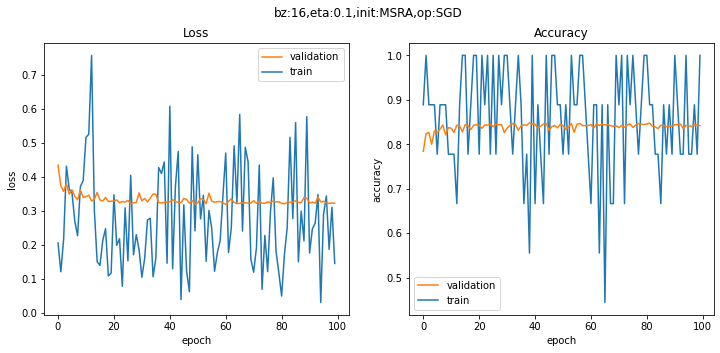

In [2]:
from learning.miniDP.ClassificationLayer import ClassificationLayer, Logistic
from learning.miniDP.ActivateLayer import ActivationLayer, Relu
from learning.miniDP.FullConnectionLayer import FullLayer
from learning.miniDP.NeuralNet import NeuralNet
from learning.miniDP.EnumDef import NetType, InitialMethod, StopCondition, Stopper, XCoordinate
from learning.miniDP.HyperParameter import HyperParameter

hyperparams = HyperParameter(eta=0.1, max_epoch=100, batch_size=16, net_type=NetType.BinaryClassifier,
                             init_method=InitialMethod.MSRA, stopper=Stopper(StopCondition.StopDiff, 1e-3))
net =NeuralNet(hyperparams)
net.addLayer(FullLayer(14,32,hyperparams))
net.addLayer(ActivationLayer(Relu()))
net.addLayer(FullLayer(32,16,hyperparams))
net.addLayer(ActivationLayer(Relu()))
net.addLayer(FullLayer(16,8,hyperparams))
net.addLayer(ActivationLayer(Relu()))
net.addLayer(FullLayer(8,4,hyperparams))
net.addLayer(ActivationLayer(Relu()))
net.addLayer(FullLayer(4,1,hyperparams))
net.addLayer(ClassificationLayer(Logistic()))
net.train(dataReader,checkpoint=1,need_test=True)
net.showLossHistory(hyperparams.toString(),XCoordinate.Epoch)